## Bharath Intern: Data Science
## Task3: Number Recogonition
## By
## P.Balaji

In [ ]:
pip install matplotlib

In [3]:
pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/fb/c4/f574ba6f04e6d7bf8c38d23e7a52389566dd7631fee0bcdd79ea07ef2dbf/opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB 163.8 kB/s eta 0:03:53
   ---------------------------------------- 0.0/38.1 MB 163.8 kB/s eta 0:03:53
   ---------------------------------------- 0.0/38.1 MB 163.8 kB/s eta 0:03:53
   ---------------------------------------- 0.0/38.1 MB 122.9 kB/s eta 0:05:10
   ---------------------------------------- 0.0/38.1 MB 122.9 kB/s eta 0:05:10
   ---------------------------------------- 0.0/38.1 MB 122.9 kB/s eta 0:05:10
   ----------------------

In [6]:
pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/5f/08/c66e99f06fb73f727c870172f0962c103262ac68839cc05234709b7b45c2/scikit_learn-1.3.0-cp38-cp38-win_amd64.whl.metadata
     ---------------------------------------- 0.0/42.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/42.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/42.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/42.2 MB ? eta -:--:--
     --------------------------------------- 0.0/42.2 MB 217.9 kB/s eta 0:03:14
     --------------------------------------- 0.1/42.2 MB 233.8 kB/s eta 0:03:01
     --------------------------------------- 0.1/42.2 MB 275.8 kB/s eta 0:02:33
     --------------------------------------- 0.1/42.2 MB 297.7 kB/s eta 0:02:22
     --------------------------------------- 0.1/42.2 MB 257.2 kB/s eta 0:02:44
     --------------------------------------- 0.1/42.2 MB 283.8 kB/s eta 0:02:29
     -----------

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy

In [2]:
def load_data(data_path):
    images = []
    labels = []
    label_mapping = {}

    for label_dir in os.listdir(data_path):
        if not label_dir.startswith('.'):
            label_mapping[len(label_mapping)] = label_dir

            label_path = os.path.join(data_path, label_dir)
            for image_file in os.listdir(label_path):
                if not image_file.startswith('.'):
                    image_path = os.path.join(label_path, image_file)
                    label = len(label_mapping) - 1

                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                    image = cv2.resize(image, (28, 28))  # Resize images to a common size
                    images.append(image)
                    labels.append(label)

    images = np.array(images)
    labels = np.array(labels)

    return images, labels, label_mapping

In [3]:
def build_model(num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [4]:
data_path ="C:\\Users\\Poojith Chowdary\\MLIA\\ocr\\data\\training_data"
images, labels, label_mapping = load_data(data_path)

In [5]:
# Normalize images and add a channel dimension
images = images / 255.0
images = images.reshape(-1, 28, 28, 1)

X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Data augmentation for better generalization
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1)
datagen.fit(X_train)

num_classes = len(label_mapping)
model = build_model(num_classes)
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 128)         0

In [7]:
# Training with data augmentation
epochs = 10
batch_size = 32

history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size), steps_per_epoch=len(X_train) 
                    // batch_size,epochs=epochs,validation_data=(X_val, y_val))

Epoch 1/10
515/515 [==============================] - 18s 34ms/step - loss: 0.4092 - accuracy: 0.8543 - val_loss: 0.2959 - val_accuracy: 0.8798
Epoch 2/10
515/515 [==============================] - 18s 34ms/step - loss: 0.4099 - accuracy: 0.8527 - val_loss: 0.2853 - val_accuracy: 0.8958
Epoch 3/10
515/515 [==============================] - 17s 33ms/step - loss: 0.3787 - accuracy: 0.8647 - val_loss: 0.2893 - val_accuracy: 0.8888
Epoch 4/10
515/515 [==============================] - 17s 34ms/step - loss: 0.3783 - accuracy: 0.8611 - val_loss: 0.3006 - val_accuracy: 0.8902
Epoch 5/10
515/515 [==============================] - 17s 33ms/step - loss: 0.3761 - accuracy: 0.8624 - val_loss: 0.2619 - val_accuracy: 0.9016
Epoch 6/10
515/515 [==============================] - 18s 34ms/step - loss: 0.3564 - accuracy: 0.8691 - val_loss: 0.2862 - val_accuracy: 0.8941
Epoch 7/10
515/515 [==============================] - 17s 33ms/step - loss: 0.3514 - accuracy: 0.8713 - val_loss: 0.2713 - val_accuracy:

In [8]:
test_data_path = "C:\\Users\\Poojith Chowdary\\MLIA\\ocr\\data\\testing_data"
test_images, test_labels, _ = load_data(test_data_path)

# Normalize and reshape the test images
test_images = test_images / 255.0
test_images = test_images.reshape(-1, 28, 28, 1)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


Test Loss: 0.1733, Test Accuracy: 0.9137


<h2 style="font-size: 40px; text-transform: uppercase; font-family: 'Gambetta', serif; letter-spacing: -3px; transition: 700ms ease; font-variation-settings: 'wght' 311 ; color: PaleGoldenRod; outline: none;text-align: center; background-color:   #2e4053   ; margin: 10px; padding:10px">Test</h2>

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import matplotlib.image as mpimg

def load_single_image(image_path):
    image_path_str = str(image_path)  # Convert image_path to string
    image = cv2.imread(image_path_str, cv2.IMREAD_GRAYSCALE)
    if image is not None:
        image = cv2.resize(image, (28, 28))  # Resize the image to the input size of the model
        image = np.expand_dims(image, axis=-1)  # Add a channel dimension
        image = image / 255.0  # Normalize the image
        return image
    else:
        return None

def predict_single_image(image_path, model, label_mapping):
    image = load_single_image(image_path)
    if image is not None:
        prediction = model.predict(np.expand_dims(image, axis=0))
        predicted_label = np.argmax(prediction[0])
        class_name = label_mapping[predicted_label]
        return class_name
    else:
        return None

def select_random_image_from_class(data_path, label, label_mapping):
    class_path = os.path.join(data_path, label_mapping[label])
    image_files = [f for f in os.listdir(class_path) if f.endswith('.png')]
    random_image_file = random.choice(image_files)
    random_image_path = os.path.join(class_path, random_image_file)
    return random_image_path

1/1 [==============================] - 0s 41ms/step


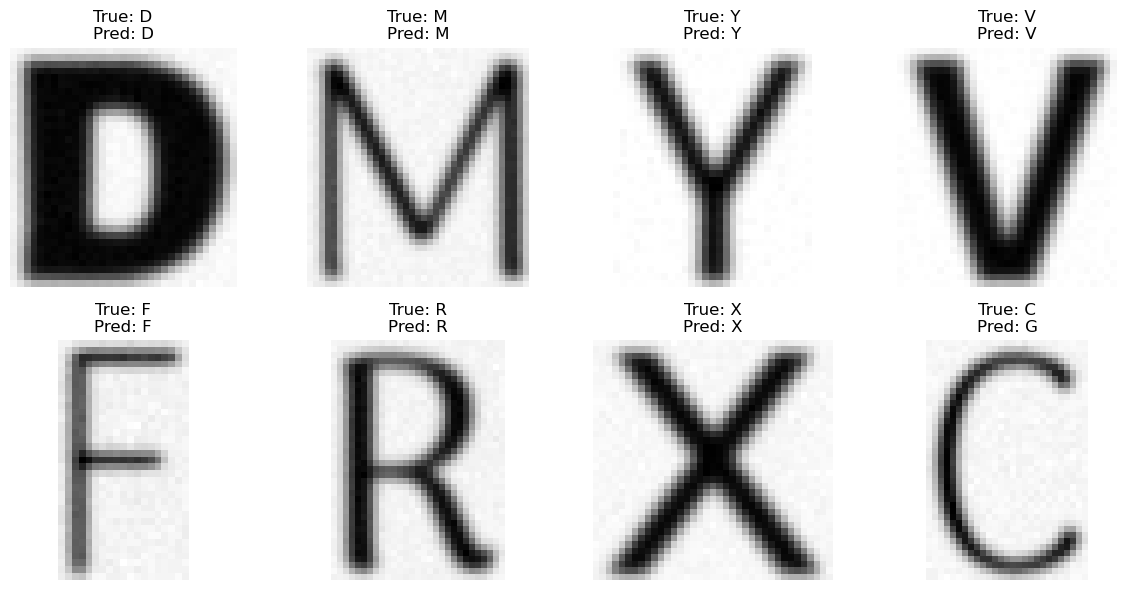

In [11]:
# Load the test images and labels
test_data_path = "C:\\Users\\Poojith Chowdary\\MLIA\\ocr\\data\\testing_data"
test_images, test_labels, _ = load_data(test_data_path)


# Select random images and their labels from the test dataset
num_samples = 8  # Number of images to display (2 rows x 4 columns)
num_test_images = len(test_images)
random_indices = random.sample(range(num_test_images), min(num_samples, num_test_images))
selected_labels = test_labels[random_indices]

# Predict the classes for the selected images
predicted_classes = []
for i in random_indices:
    image_path = select_random_image_from_class(test_data_path, test_labels[i], label_mapping)
    predicted_class = predict_single_image(image_path, model, label_mapping)
    predicted_classes.append(predicted_class)

# Display the selected images in a grid
fig, axs = plt.subplots(2, 4, figsize=(12, 6))
for i in range(2):
    for j in range(4):
        if i * 4 + j < len(random_indices):
            label = label_mapping[selected_labels[i * 4 + j]]
            predicted_class = predicted_classes[i * 4 + j]

            random_image_path = select_random_image_from_class(test_data_path, selected_labels[i * 4 + j], label_mapping)
            image = mpimg.imread(random_image_path)

            axs[i, j].imshow(image, cmap='gray')
            axs[i, j].axis('off')
            axs[i, j].set_title(f"True: {label}\nPred: {predicted_class}")
        else:
            axs[i, j].axis('off')

plt.tight_layout()
plt.show()